# *Getting Started with pandas:* 
# Part 2) Essential Functionality


This lecture will walk you through the fundamental mechanics of interacting with the data contained in a Series or DataFrame.

In the lectures to come, we will delve more deeply into data analysis and manipulation topics using pandas. This lecture is not intended to serve as exhaustive documentation for the pandas library; instead, we’ll focus on the most important features, leaving the less common (i.e., more esoteric) things for you to explore on your own.

In [1]:
import pandas as pd
import numpy as np

## 2.1 Reindexing

An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index. Consider an example:

In [2]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [86]:
obj 

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

Calling `reindex` on this Series rearranges the data according to the new index, introducing missing values if any index values were not already present:

In [87]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [88]:
obj2

a    0.0
b    1.0
c    2.0
d    3.0
e    NaN
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The `method` option allows us to do this, using a method such as `ffill`, which forward-fills the values:

In [89]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [90]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [91]:
# obj3.reindex(range(6), method='ffill')
obj3.reindex(range(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

With DataFrame, `reindex` can alter either the (row) index, columns, or both. When passed only a sequence, it reindexes the rows in the result:

In [92]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                    index=['a', 'c', 'd'],
                    columns=['Ohio', 'Texas', 'California'])

In [93]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [12]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [13]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


The columns can be `reindexed` with the columns keyword:

In [14]:
states = ['Texas', 'Utah', 'California']

In [19]:
frame.reindex(columns=states)

#frame['Ohio']

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


See Table 5-3 for more about the arguments to `reindex`.

<img src="Pictures/pandas/pandas2.png" alt="testtest" style="width: 700px;">

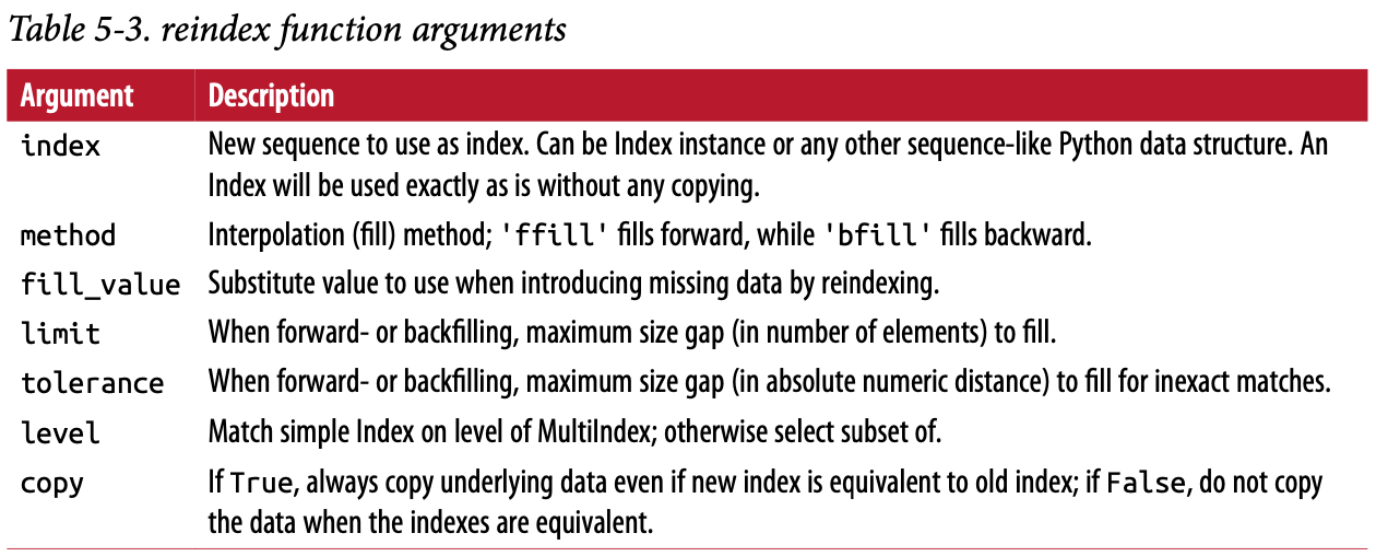

## 2.2 Dropping Entries from an Axis

Dropping one or more entries from an axis is easy if you already have an index array or list without those entries. As that can require a bit of munging and set logic, the `drop` method will return a new object with the indicated value or values deleted from an axis:

In [21]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e']) 

In [22]:
obj 

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [23]:
new_obj = obj.drop('c')

In [24]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [26]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

With DataFrame, index values can be deleted from either axis. To illustrate this, we first create an example DataFrame:

In [27]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])

In [28]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Calling `drop` with a sequence of labels will drop values from the row labels (axis 0):

In [29]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


We can drop values from the columns by passing `axis=1` or `axis='columns`':

In [30]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [31]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


Many functions, like `drop`, which modify the size or shape of a Series or DataFrame, can manipulate an object *in-place* without returning a new object:

In [32]:
obj.drop('c', inplace=True) #Be careful with the inplace, as it destroys any data that is dropped.

In [33]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [37]:
# obj.drop('a', inplace=False) 
obj.drop('a', inplace=True) 

In [38]:
obj

b    1.0
d    3.0
e    4.0
dtype: float64

## 2.3 Indexing, Selection, and Filtering

Series indexing (`obj[...]`) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers. Here are some examples of this:

In [39]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [40]:
obj['b']

np.float64(1.0)

In [41]:
obj[1]

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_39174/2469632899.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[1]


np.float64(1.0)

In [42]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [43]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [44]:
obj[[1, 3]]

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_39174/2982346117.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[[1, 3]]


b    1.0
d    3.0
dtype: float64

In [46]:
obj[obj < 2]
# obj < 2

a     True
b     True
c    False
d    False
dtype: bool

**Slicing with labels behaves differently than normal Python slicing in that the endpoint is inclusive:**

In [48]:
# obj['b':'c']
obj['b':'d']

b    1.0
c    2.0
d    3.0
dtype: float64

*Setting* using these methods modifies the corresponding section of the Series:

In [49]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])

In [50]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [58]:
# data['two']
# data.loc['Ohio']
data.loc['Ohio': 'Utah']

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


In [60]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Indexing like this has a few special cases. First, slicing or selecting data with a boolean array:

In [61]:
data[:2] 

#The row selection syntax data[:2] is provided as a convenience. 
#Passing a single element or a list to the [] operator selects columns.

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [62]:
data['three'] > 5 

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [63]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15



Another use case is in indexing with a boolean DataFrame, such as one produced by a scalar comparison:

In [64]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [66]:
data[data < 5] = 0

In [67]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### 2.3.1. Selection with `loc` and `iloc`

For DataFrame label-indexing on the rows, I introduce the special indexing operators `loc` and `iloc`. They enable you to select a subset of the rows and columns from a DataFrame with NumPy-like notation using either axis labels (`loc`) or integers (`iloc`).

As a preliminary example, let’s select a single row and multiple columns by label:

In [68]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

We’ll then perform some similar selections with integers using `iloc`:

In [69]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [70]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [71]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


Both indexing functions work with slices in addition to single labels or lists of labels:

In [72]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [73]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


So there are many ways to select and rearrange the data contained in a pandas object. For DataFrame, Table 5-4 provides a short summary of many of them. As you’ll see later, there are a number of additional options for working with hierarchical indexes.

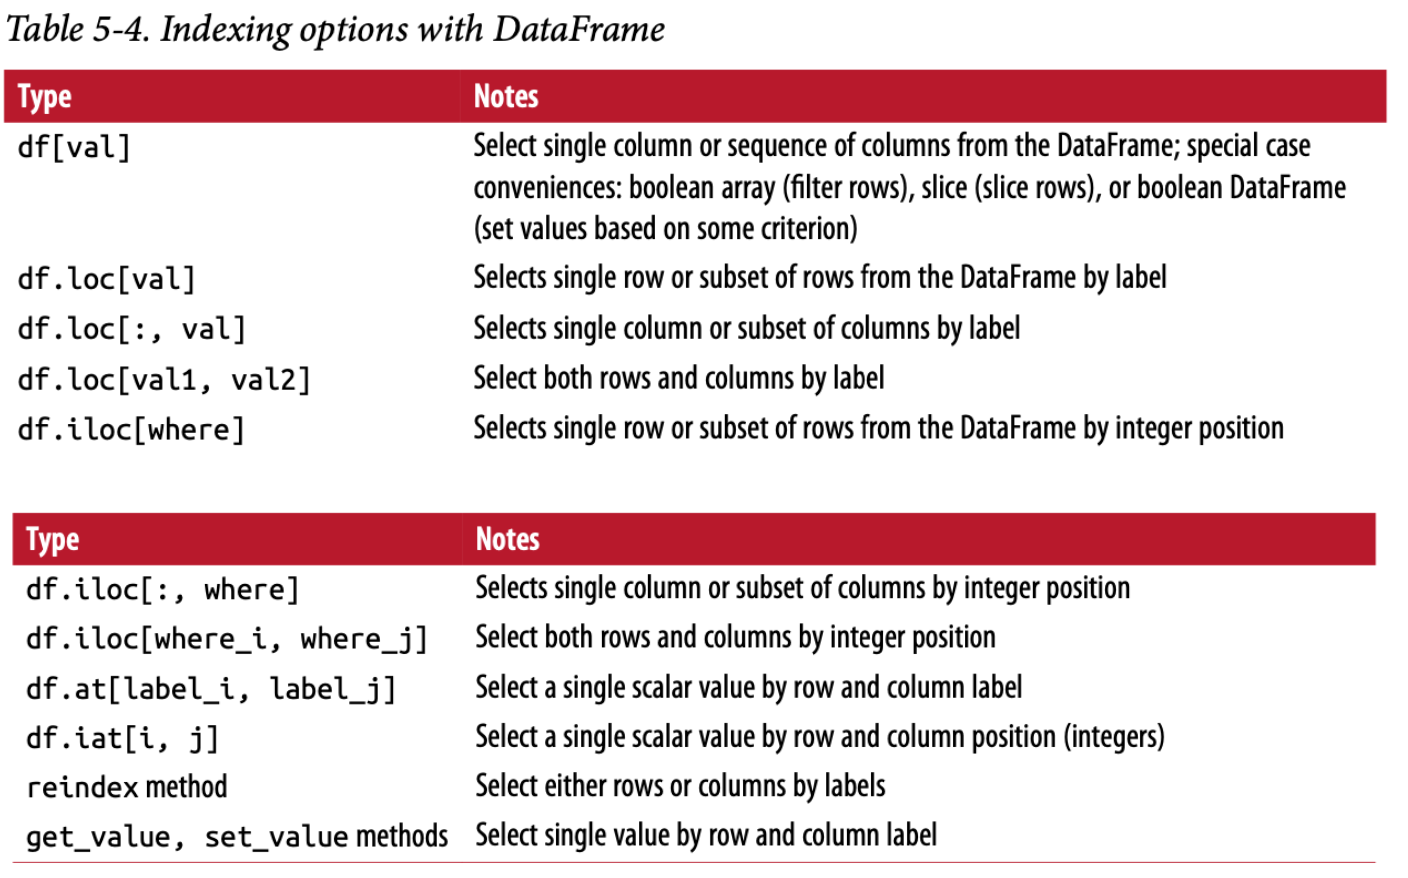

## 2.4 Integer Indexes

Working with pandas objects indexed by integers is something that often trips up new users due to some differences with indexing semantics on built-in Python data structures like lists and tuples. For example, you might not expect the following code to generate an error:

In [74]:
ser = pd.Series(np.arange(3.))

In [75]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [78]:
#In this case, pandas could “fall back” on integer indexing, 
#but it’s difficult to do this in general without introducing subtle bugs. 
#Here we have an index containing 0, 1, 2, but inferring what the user wants (label-based indexing or position-based) is difficult:

ser[-1]

KeyError: -1

On the other hand, with a non-integer index, there is no potential for ambiguity:

In [79]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [80]:
ser2 

a    0.0
b    1.0
c    2.0
dtype: float64

In [81]:
ser2[-1]

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_39174/811950851.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser2[-1]


np.float64(2.0)

To keep things consistent, if you have an axis index containing integers, data selection will always be label-oriented. For more precise handling, use `loc` (for labels) or `iloc` (for integers):

In [82]:
ser[:1]

0    0.0
dtype: float64

In [83]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [84]:
ser.iloc[:1]

0    0.0
dtype: float64

## 2.5 Arithmetic and Data Alignment

An important pandas feature for some applications is the behavior of arithmetic between objects with different indexes. When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs. Let’s look at an example:

In [94]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [95]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
              index=['a', 'c', 'e', 'f', 'g'])

In [96]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [97]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [98]:
#Adding these together yields:

s1 + s2

#The internal data alignment introduces missing values in the label locations that don’t overlap. 
#Missing values will then propagate in further arithmetic computations.

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In the case of DataFrame, alignment is performed on both the rows and the columns:

In [99]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                  index=['Ohio', 'Texas', 'Colorado'])

In [100]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [101]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [102]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Adding these together returns a DataFrame whose index and columns are the unions of the ones in each DataFrame:

In [103]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


Since the `'c'` and `'e'` columns are not found in both DataFrame objects, they appear as all missing in the result. The same holds for the rows whose labels are not common to both objects.

If you add DataFrame objects with no column or row labels in common, the result will contain all nulls:

In [104]:
df1 = pd.DataFrame({'A': [1, 2]})

In [105]:
df2 = pd.DataFrame({'B': [3, 4]})

In [106]:
df1

,A
0,1
1,2


In [107]:
df2

,B
0,3
1,4


In [108]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


## 2.6 Arithmetic methods with fill values

In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other:

In [125]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))

In [126]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

In [127]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [128]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [129]:
df2.loc[1, 'b'] = np.nan

In [130]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [131]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Using the `add` method on df1, I pass `df2` and an argument to `fill_value`:

In [132]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


See Table 5-5 for a listing of Series and DataFrame methods for arithmetic. Each of them has a counterpart, starting with the letter `r`, that has arguments flipped. So these two statements are equivalent:

In [133]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [134]:
1 / df1 

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [137]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [139]:
5 + df1

,a,b,c,d
0,5.0,6.0,7.0,8.0
1,9.0,10.0,11.0,12.0
2,13.0,14.0,15.0,16.0


In [138]:
df1.radd(5)

,a,b,c,d
0,5.0,6.0,7.0,8.0
1,9.0,10.0,11.0,12.0
2,13.0,14.0,15.0,16.0


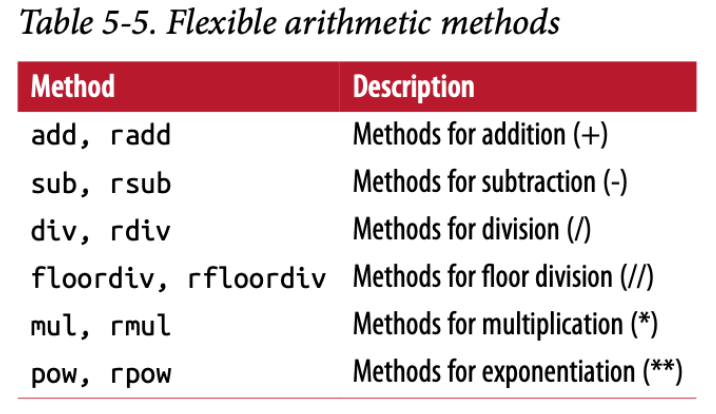

Relatedly, when reindexing a Series or DataFrame, you can also specify a different fill value:

In [140]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [141]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [142]:
df1.reindex(columns=df2.columns, fill_value=0) 

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


## 2.8 Operations between DataFrame and Series

As with NumPy arrays of different dimensions, arithmetic between DataFrame and Series is also defined. First, as a motivating example, consider the difference between a two-dimensional array and one of its rows:

In [143]:
arr = np.arange(12.).reshape((3, 4))

In [144]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [145]:
arr[0]

array([0., 1., 2., 3.])

In [146]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

When we subtract `arr[0]` from `arr`, the subtraction is performed once for each row. This is referred to as *broadcasting* and is explained in more detail as it relates to general NumPy arrays in textbook Appendix A. Operations between a DataFrame and a Series are similar:

In [147]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [148]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [149]:
series = frame.iloc[0]

In [150]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

By default, arithmetic between DataFrame and Series matches the index of the Series on the DataFrame’s columns, broadcasting down the rows:

In [151]:
frame - series 

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


If an index value is not found in either the DataFrame’s columns or the Series’s index, the objects will be reindexed to form the union:

In [152]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [153]:
series2

b    0
e    1
f    2
dtype: int64

In [154]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [155]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


If you want to instead broadcast over the columns, matching on the rows, you have to use one of the arithmetic methods. For example:

In [156]:
series3 = frame['d']

In [157]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [158]:
frame.sub(series3, axis='index') 

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


The axis number that you pass is the *axis to match on*. In this case we mean to match on the DataFrame’s row index (`axis='index'` or `axis=0`) and broadcast across.

## 2.7 Function Application and Mapping

NumPy `ufuncs` (element-wise array methods) also work with pandas objects:

In [159]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [160]:
frame

,b,d,e
Utah,0.537030,2.136080,-0.459632
Ohio,2.870990,0.310865,0.793945
Texas,-0.478425,-0.855996,1.840391
Oregon,0.172799,-1.137360,-1.361345


In [161]:
np.abs(frame)  # Calculate the absolute value element-wise.

,b,d,e
Utah,0.537030,2.136080,0.459632
Ohio,2.870990,0.310865,0.793945
Texas,0.478425,0.855996,1.840391
Oregon,0.172799,1.137360,1.361345


Another frequent operation is applying a function on one-dimensional arrays to each column or row. DataFrame’s `apply` method does exactly this:

In [162]:
f = lambda x: x.max() - x.min()

In [165]:
frame.apply(f)

b    3.349415
d    3.273440
e    3.201736
dtype: float64

Here the function `f`, which computes the difference between the maximum and minimum of a Series, is invoked once on each column in `frame`. The result is a Series having the columns of `frame` as its index.

If you pass `axis='columns'` to `apply`, the function will be invoked once per row instead:

In [166]:
frame.apply(f, axis='columns')

Utah      2.595712
Ohio      2.560125
Texas     2.696387
Oregon    1.534144
dtype: float64

Many of the most common array statistics (like `sum` and `mean`) are DataFrame methods, so using apply is not necessary.

The function passed to `apply` need not return a scalar value; it can also return a Series with multiple values:

In [167]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max']) 

In [168]:
frame.apply(f)

,b,d,e
min,-0.478425,-1.13736,-1.361345
max,2.870990,2.13608,1.840391


Element-wise Python functions can be used, too. Suppose you wanted to compute a formatted string from each floating-point value in `frame`. You can do this with `apply map`:

In [169]:
format = lambda x: '%.2f' % x

In [170]:
frame.applymap(format) 

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_39174/1828940842.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(format)


,b,d,e
Utah,0.54,2.14,-0.46
Ohio,2.87,0.31,0.79
Texas,-0.48,-0.86,1.84
Oregon,0.17,-1.14,-1.36


The reason for the name `applymap` is that Series has a `map` method for applying an element-wise function:

In [171]:
frame['e'].map(format) 

Utah      -0.46
Ohio       0.79
Texas      1.84
Oregon    -1.36
Name: e, dtype: object

## 2.8 Sorting and Ranking

Sorting a dataset by some criterion is another important built-in operation. To sort lexicographically by row or column index, use the `sort_index` method, which returns a new, sorted object:

In [172]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [173]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [174]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis:

In [175]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])

In [176]:
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [177]:
frame.sort_index(axis=1)  # axis=1 (or axis='columns') is vertical axis.

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [178]:
frame.sort_index(axis=0) # axis=0 (or axis='rows' is horizontal axis.

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


The data is sorted in ascending order by default, but can be sorted in descending order, too:

In [179]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its sort_values method:

In [180]:
obj = pd.Series([4, 7, -3, 2])

In [181]:
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [182]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Any missing values are sorted to the end of the Series by default:

In [183]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [184]:
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [185]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

When sorting a DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the `by` option of `sort_values`:

In [186]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [187]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [188]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


To sort by multiple columns, pass a list of names:

In [189]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


*Ranking* assigns ranks from one through the number of valid data points in an array. The `rank` methods for Series and DataFrame are the place to look; by default `rank` breaks ties by assigning each group the mean rank:

In [190]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])


In [191]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [192]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

This means that essencially all values get assigned a "highscore". The Value 7 is the highest and therefore gets the highest ranking but since the value 7 is there twice, it both gets the highscore 7 AND 6. But since the value 7 can not have 2 different "highscores", it gets assigned the average of both rankings. (6+7)/2 is 6.5 -> that is the ranking of the data Value 7. other values are more straight forward, for example -5 is the lowest and therefore gets the worst rank.


Ranks can also be assigned according to the order in which they’re observed in the data:

In [193]:
obj.rank(method='first') 

#Here, instead of using the average rank 6.5 for the entries 0 and 2, 
#they instead have been set to 6 and 7 because label 0 precedes label 2 in the data.

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

You can rank in descending order, too:

In [194]:
# Assign tie values the maximum rank in the group

In [195]:
obj.rank(ascending=False, method='max') 

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

DataFrame can compute ranks over the rows or the columns:

In [196]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})

In [197]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [198]:
frame.rank(axis='columns') 

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


See Table 5-6 for a list of tie-breaking methods available.

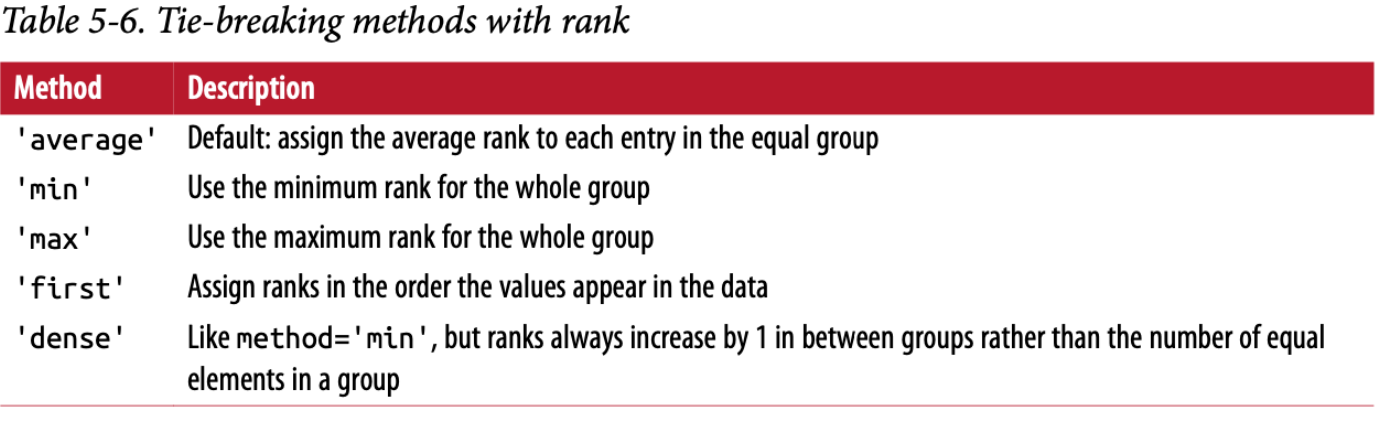

## 2.9 Axis Indexes with Duplicate Labels

Up until now all of the examples we’ve looked at have had unique axis labels (index values). While many pandas functions (like `reindex)` require that the labels be unique, it’s not mandatory. Let’s consider a small Series with duplicate indices:


In [199]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [200]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

The index’s `is_unique` property can tell you whether its labels are unique or not:

In [201]:
obj.index.is_unique

False

Data selection is one of the main things that behaves differently with duplicates. Indexing a label with multiple entries returns a Series, while single entries return a scalar value:

In [202]:
obj['a']

a    0
a    1
dtype: int64

In [203]:
obj['c']

np.int64(4)

This can make your code more complicated, as the output type from indexing can
vary based on whether a label is repeated or not.

The same logic extends to indexing rows in a DataFrame:

In [204]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [205]:
df

,0,1,2
a,0.548325,-0.837816,-0.222701
a,-0.051315,-0.173058,-2.024150
b,1.528585,0.799535,0.616471
b,0.234072,-0.525619,-0.527212


In [206]:
df.loc['b']

,0,1,2
b,1.528585,0.799535,0.616471
b,0.234072,-0.525619,-0.527212
